# Business Understanding

Sebuah perusahaan label musik ingin menganalisis karakteristik dari beberapa lagu dengan popularitas yang tinggi. Perusahaan ingin mengetahui variabel apa saja aja yang kemungkinan mempengaruhi tingkat popularitas dari sebuah musik. Hasil dari analisis ini akan digunakan sebagai pertimbangan dalam proses pembuatan lagu dengan harapan lagu yang dibuat dapamendapat popularitas yang 

# Data Understanding

Dataset ini berisi informasi fiksi tentang 50.000 lagu dari berbagai genre musik. Dataset ini mencakup fitur-fitur seperti popularitas lagu, jumlah streaming, durasi, artis, album, dan bahasa. Dataset ini dibuat oleh ChatGPT dan tidak mengandung data nyata.Dataset ini dapat digunakan untuk tujuan kreatif dan pendidikan, seperti analisis musik, peramalan tren, dan studi popularitas lagu.
- song_id: Pengenal unik untuk lagu.
- song_title: Judul lagu.
- artist: Artis yang membawakan lagu tersebut.
- album: Album tempat lagu tersebut ditampilkan.
- genre: Genre musik dari lagu tersebut.
- release_date: Tanggal rilis lagu.
- duration: Durasi lagu (dalam detik).
- popularity: Skor popularitas lagu (1-100).
- stream: Jumlah total stream untuk lagu tersebut.
- language: Bahasa dari lagu tersebut.
- explicit_content: Apakah lagu mengandung konten eksplisit (misalnya, bahasa yang tidak pantas).
- label: Label rekaman yang menerbitkan lagu tersebut.
- composer: Pencipta lagu tersebut.
- produser: Produser dari lagu tersebut.
- collaboration: Apakah lagu tersebut merupakan kolaborasi dengan artis lain.

# Data Cleaning

**Set Up Library Pyspark**

In [155]:
# Install dan import library pyspark
!pip  install pyspark
import pyspark
from pyspark.sql import SparkSession



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


**Membuat Sesi Analasis Data**

In [156]:
# Inisialisasi ruang kerja analisis data musik menggunakan SparkSession
spark = SparkSession.builder.appName("DataMusic").getOrCreate()

**Membaca Data Secara Keseluruhan**

In [157]:
df = spark.read.csv("spotify_songs_dataset.csv", inferSchema=True, header=True)
df.toPandas()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,None
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,None
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,None
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,None
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SP49996,Event push do body.,Shelley Robinson,Wrong cup.,Pop,1999-05-26,272.0,38,25078113,Spanish,No,Indie,Melissa Wilson,Leslie Ferguson,Daniel Cruz
49996,SP49997,Share clearly role.,Jennifer Kennedy,That actually.,Folk,2016-08-21,355.0,62,29908581,Korean,Yes,Atlantic Records,Timothy Rice,Randall Martinez,None
49997,SP49998,Wonder type simply.,Hailey Walsh,South Democrat.,Pop,1997-02-28,207.0,38,75864558,Spanish,No,Atlantic Records,Susan Diaz,Katrina Fleming,None
49998,SP49999,Company.,Leah Coleman,Front.,Electronic,1996-07-15,266.0,10,41817978,English,No,Sony Music,Dr. Zachary Bell,Pam Schultz,None


In [158]:
# Menampilkan keterangan dari seluruh variabel apakah terdapat nilai null atau tidak
df.printSchema()

root
 |-- song_id: string (nullable = true)
 |-- song_title: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- release_date: date (nullable = true)
 |-- duration: double (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- stream: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- explicit_content: string (nullable = true)
 |-- label: string (nullable = true)
 |-- composer: string (nullable = true)
 |-- producer: string (nullable = true)
 |-- collaboration: string (nullable = true)



Dari penjelasan dataset di atas, data dengan tipe numerik yaitu antara lain duration, popularity, dan stream. Terdapat beberapa kolom yang bisa diubah tipe data nya menjadi numerik yaitu explicit content menggunakan binary encoder.

In [159]:
df_dropsongid = df.drop('song_id')


In [160]:
df_with_duplicate = df_dropsongid.groupBy(df_dropsongid.columns).count().filter("count > 1")
df_with_duplicate.show()

+----------+------+-----+-----+------------+--------+----------+------+--------+----------------+-----+--------+--------+-------------+-----+
|song_title|artist|album|genre|release_date|duration|popularity|stream|language|explicit_content|label|composer|producer|collaboration|count|
+----------+------+-----+-----+------------+--------+----------+------+--------+----------------+-----+--------+--------+-------------+-----+
+----------+------+-----+-----+------------+--------+----------+------+--------+----------------+-----+--------+--------+-------------+-----+



Berdasarkan tabel data diatas, dapat dilihat bahwa pada dataset tidak terdapat duplikasi data, sehingga tidak perlu ada data yang dihapus. Proses cleaning data dapat dilakukan dengan parameter lain.

In [161]:
numeric_colums = [col for col, dtype in df.dtypes if dtype=='int' or dtype == 'double']
df.select(numeric_colums).describe().show()


+-------+------------------+------------------+--------------------+
|summary|          duration|        popularity|              stream|
+-------+------------------+------------------+--------------------+
|  count|             45000|             50000|               50000|
|   mean|239.65917777777778|          50.78344|    5.019183185358E7|
| stddev|  50.1367271681458|28.948748891232775|2.8936244082779203E7|
|    min|              33.0|                 1|                1899|
|    max|             433.0|               100|            99999128|
+-------+------------------+------------------+--------------------+



Dari deskripsi di atas, terdapat kejanggalan yaitu jumlah data duration hanya ada sebanyak 45000 di mana total data 5000. Maka dari itu perlu dianalisis apakah ini termasuk ke dalam missing value atau tidak. Dan bisa dilihat bahwa hampir tidak ada outlier yang terlalu signifikan dari nilai rata-rata Untuk lebih lanjuutnya pada tahapan EDA akan dilakukan visualisasi.

In [162]:
df = df.drop( "song_title", "artist", "album", "release_date", "label", "composer", "producer", "collaboration")
df.show()

+-------+----------+--------+----------+--------+--------+----------------+
|song_id|     genre|duration|popularity|  stream|language|explicit_content|
+-------+----------+--------+----------+--------+--------+----------------+
| SP0001|Electronic|   282.0|        42|35055874| English|             Yes|
| SP0002|Electronic|   127.0|        50| 9249527| English|             Yes|
| SP0003|       Pop|    NULL|        10|76669110| English|             Yes|
| SP0004|   Hip-Hop|   214.0|        86|34732016| English|              No|
| SP0005|       Pop|   273.0|        63|96649372| English|             Yes|
| SP0006|      Folk|   312.0|        74|82613530|    NULL|             Yes|
| SP0007|   Hip-Hop|   336.0|        49|88337653|Japanese|              No|
| SP0008|   Hip-Hop|   237.0|         9|95988275| English|              No|
| SP0009|       Pop|    NULL|        74|67287444| Spanish|              No|
| SP0010|Electronic|   216.0|         2|48726791| English|             Yes|
| SP0011|Ele

Pada tahapan ini kami menghapus beberapa variabel dengan tipe data string yang tidak memitu mempengaruhi popularitas sebuah musikungkinakan untuk dilakukan analisis. Untuk variabel genre, language, dan explicity_content perlu dipertimbangkan karena value unik yang terbilang sedikit sehingga bisa dilakukan encoding.beg

In [163]:
df.select("genre").distinct().show()

+----------+
|     genre|
+----------+
|      Jazz|
|      Folk|
| Classical|
|       R&B|
|       Pop|
|    Reggae|
|Electronic|
|   Country|
|   Hip-Hop|
+----------+



In [164]:
df.select("language").distinct().show()


+--------+
|language|
+--------+
|Japanese|
| English|
| Spanish|
| Italian|
|  Korean|
|  French|
|  German|
|    NULL|
+--------+



In [165]:
df.select("explicit_content").distinct().show()


+----------------+
|explicit_content|
+----------------+
|              No|
|             Yes|
+----------------+



In [166]:
from pyspark.sql.functions import col, when, count

# Menghitung jumlah nilai null per kolom
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Menampilkan hasil
null_counts.show()


+-------+-----+--------+----------+------+--------+----------------+
|song_id|genre|duration|popularity|stream|language|explicit_content|
+-------+-----+--------+----------+------+--------+----------------+
|      0|    0|    5000|         0|     0|    2500|               0|
+-------+-----+--------+----------+------+--------+----------------+



Terdapat missing balue pada variabel duration sebanyak 5000 data dan 2500 data dari variabel language. Untuk penanganan missing value ini harus di analisis terlebih dahulu pada tahapan EDA apakah data yang hilang harus dihapus atau bisa diisi dengan metode impute.

Dari kolom genre terdapat 8 genre yang terdapat di dalam dataset. Kita bisa mengubah data tersebut menjadi integer dengan metode OneHotEncoder. 

In [167]:
df.describe().show()

+-------+-------+---------+------------------+------------------+--------------------+--------+----------------+
|summary|song_id|    genre|          duration|        popularity|              stream|language|explicit_content|
+-------+-------+---------+------------------+------------------+--------------------+--------+----------------+
|  count|  50000|    50000|             45000|             50000|               50000|   47500|           50000|
|   mean|   NULL|     NULL|239.65917777777778|          50.78344|    5.019183185358E7|    NULL|            NULL|
| stddev|   NULL|     NULL|  50.1367271681458|28.948748891232775|2.8936244082779203E7|    NULL|            NULL|
|    min| SP0001|Classical|              33.0|                 1|                1899| English|              No|
|    max| SP9999|   Reggae|             433.0|               100|            99999128| Spanish|             Yes|
+-------+-------+---------+------------------+------------------+--------------------+--------+-

Terdapat 2500 missing value pada variabel language. Disini kami akan menggunakan teknik mengisi data berdasarkan modus dari dataset. Hal ini dilakukan atas pertimbangan kolom language bersifat kategorikal yang berisi 7 nilai unik sehingga dengan menerapkan teknik ini tidak akan menambah variabilitas.

In [168]:
from pyspark.sql.functions import col, count

# Menghitung modus kolom 'language'
modus = df.groupBy("language").count().orderBy(col("count").desc()).first()[0]
# Mengganti missing value dengan modus
df = df.fillna({"language": modus})
df.describe().show()



+-------+-------+---------+------------------+------------------+--------------------+--------+----------------+
|summary|song_id|    genre|          duration|        popularity|              stream|language|explicit_content|
+-------+-------+---------+------------------+------------------+--------------------+--------+----------------+
|  count|  50000|    50000|             45000|             50000|               50000|   50000|           50000|
|   mean|   NULL|     NULL|239.65917777777778|          50.78344|    5.019183185358E7|    NULL|            NULL|
| stddev|   NULL|     NULL|  50.1367271681458|28.948748891232775|2.8936244082779203E7|    NULL|            NULL|
|    min| SP0001|Classical|              33.0|                 1|                1899| English|              No|
|    max| SP9999|   Reggae|             433.0|               100|            99999128| Spanish|             Yes|
+-------+-------+---------+------------------+------------------+--------------------+--------+-

# EDA

## 1. Melihat korelasi antara hubungan genre dengan duration

Untuk melihat korelasi antara variabel genre dengan duration perlu dilakukan encoding pada variabel menjadi angka.

In [169]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Langkah 1: StringIndexer untuk kolom 'language' dan 'genre'
indexer_language = StringIndexer(inputCol="language", outputCol="language_index")
indexer_genre = StringIndexer(inputCol="genre", outputCol="genre_index")

# Langkah 2: OneHotEncoder untuk kolom 'language_index' dan 'genre_index'
encoder_language = OneHotEncoder(inputCol="language_index", outputCol="language_onehot")
encoder_genre = OneHotEncoder(inputCol="genre_index", outputCol="genre_onehot")

# Langkah 3: Menyusun pipeline untuk menggabungkan langkah-langkah tersebut
pipeline = Pipeline(stages=[indexer_language, encoder_language, indexer_genre, encoder_genre])

# Langkah 4: Melatih pipeline untuk menghasilkan transformasi
df_transformed = pipeline.fit(df).transform(df)

# Langkah 5: Menampilkan hasil dengan kolom yang baru
df_transformed.select("language", "language_index", "language_onehot", "genre", "genre_index", "genre_onehot").show(10)


+--------+--------------+---------------+----------+-----------+-------------+
|language|language_index|language_onehot|     genre|genre_index| genre_onehot|
+--------+--------------+---------------+----------+-----------+-------------+
| English|           0.0|  (6,[0],[1.0])|Electronic|        0.0|(8,[0],[1.0])|
| English|           0.0|  (6,[0],[1.0])|Electronic|        0.0|(8,[0],[1.0])|
| English|           0.0|  (6,[0],[1.0])|       Pop|        1.0|(8,[1],[1.0])|
| English|           0.0|  (6,[0],[1.0])|   Hip-Hop|        2.0|(8,[2],[1.0])|
| English|           0.0|  (6,[0],[1.0])|       Pop|        1.0|(8,[1],[1.0])|
| English|           0.0|  (6,[0],[1.0])|      Folk|        3.0|(8,[3],[1.0])|
|Japanese|           5.0|  (6,[5],[1.0])|   Hip-Hop|        2.0|(8,[2],[1.0])|
| English|           0.0|  (6,[0],[1.0])|   Hip-Hop|        2.0|(8,[2],[1.0])|
| Spanish|           1.0|  (6,[1],[1.0])|       Pop|        1.0|(8,[1],[1.0])|
| English|           0.0|  (6,[0],[1.0])|Electronic|

Pada tahapan ini, kami telah menambahkan fitur baru yaitu genre_index yang mengubah nilai genre menjadi numerik.

In [170]:
# Menghitung korelasi antara genre_index dan duration
correlation = df_transformed.stat.corr("genre_index", "duration")

print(f"Korelasi antara genre_index dan duration: {correlation}")


Korelasi antara genre_index dan duration: -0.0023606988544469408


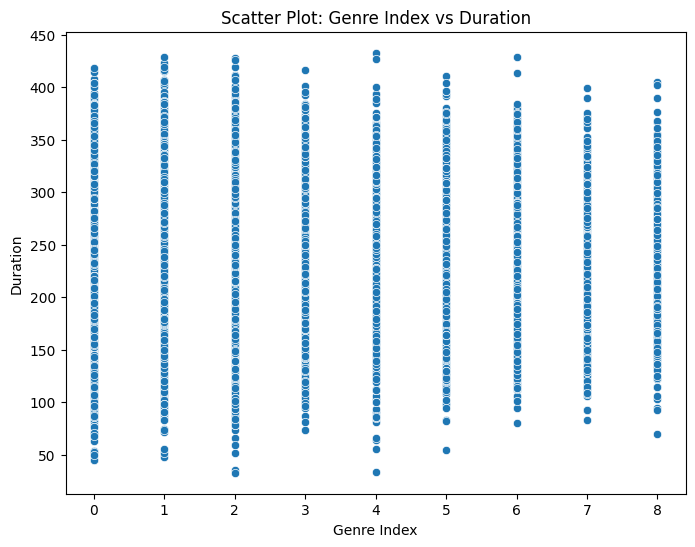

In [171]:
# Mengonversi DataFrame PySpark ke pandas
df_pandas = df_transformed.select("genre_index", "duration").toPandas()

# Import libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat plot scatter untuk melihat hubungan antara genre_index dan duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x="genre_index", y="duration", data=df_pandas)

# Menambahkan judul dan label pada plot
plt.title("Scatter Plot: Genre Index vs Duration")
plt.xlabel("Genre Index")
plt.ylabel("Duration")

# Menampilkan plot
plt.show()


Dari gambar di atas bisa disimpulkan bahwa korelasi antara variabel genre dan duration menghasilkan korelasi yang lemah. Sehinga untuk penanganan null value pada duration akan dihapus.

In [172]:
df_transformed = df_transformed.dropna()
df_transformed.describe().show()

+-------+-------+---------+------------------+-----------------+--------------------+--------+----------------+------------------+------------------+
|summary|song_id|    genre|          duration|       popularity|              stream|language|explicit_content|    language_index|       genre_index|
+-------+-------+---------+------------------+-----------------+--------------------+--------+----------------+------------------+------------------+
|  count|  45000|    45000|             45000|            45000|               45000|   45000|           45000|             45000|             45000|
|   mean|   NULL|     NULL|239.65917777777778|50.76502222222222|5.0244793802777775E7|    NULL|            NULL|0.7905777777777778|2.0159777777777776|
| stddev|   NULL|     NULL|  50.1367271681458|28.94900089990855|2.8925800263996508E7|    NULL|            NULL|1.5516357859540082|2.0517078061550977|
|    min| SP0001|Classical|              33.0|                1|                1899| English|      

## 2. Melihat persebaran distribusi dari setiap variabel

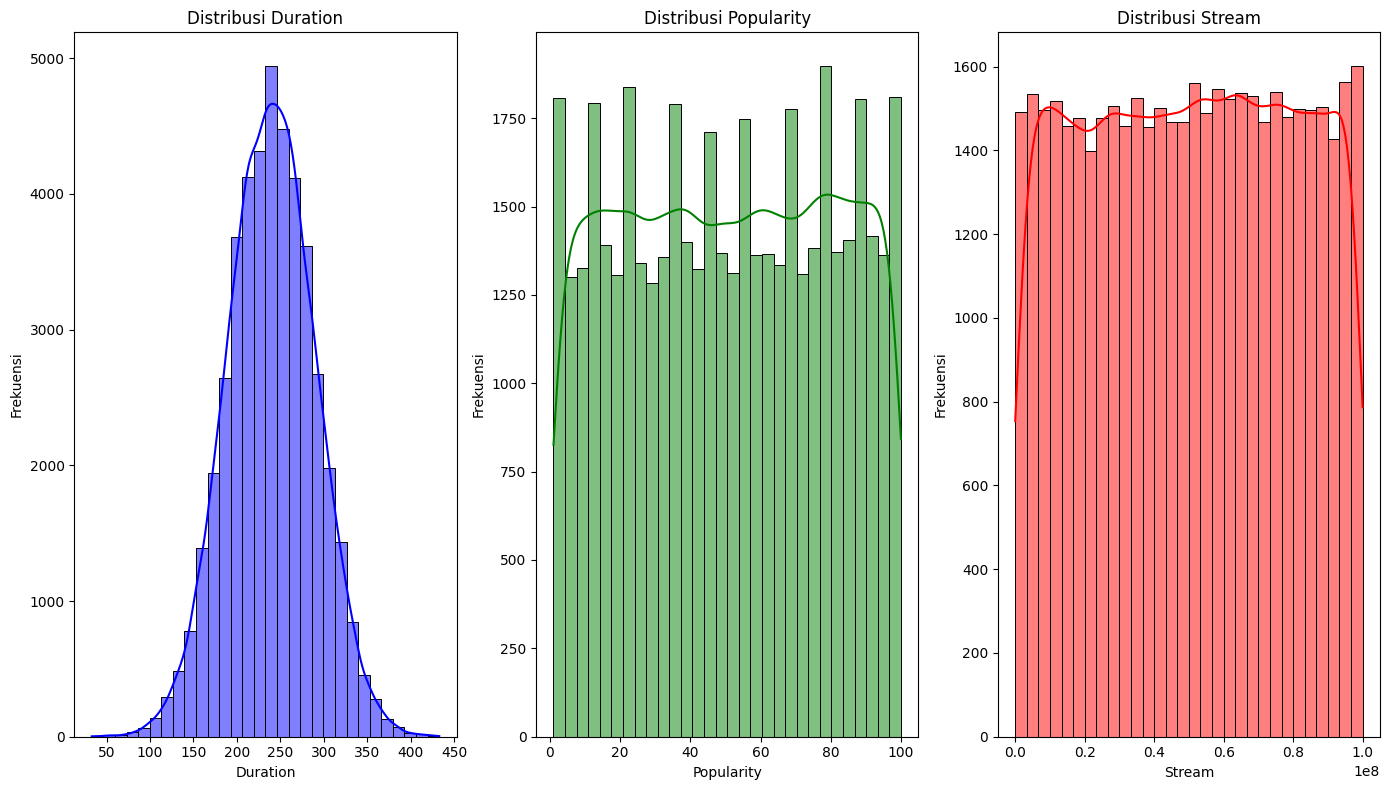

In [173]:
# Mengonversi DataFrame PySpark ke pandas
df_pandas = df_transformed.select("duration", "popularity", "stream").toPandas()

# Import libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan plot
plt.figure(figsize=(14, 8))

# Plot distribusi untuk duration
plt.subplot(1, 3, 1)
sns.histplot(df_pandas['duration'], kde=True, color='blue', bins=30)
plt.title("Distribusi Duration")
plt.xlabel("Duration")
plt.ylabel("Frekuensi")

# Plot distribusi untuk popularity
plt.subplot(1, 3, 2)
sns.histplot(df_pandas['popularity'], kde=True, color='green', bins=30)
plt.title("Distribusi Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frekuensi")

# Plot distribusi untuk stream
plt.subplot(1, 3, 3)
sns.histplot(df_pandas['stream'], kde=True, color='red', bins=30)
plt.title("Distribusi Stream")
plt.xlabel("Stream")
plt.ylabel("Frekuensi")

# Menampilkan plot
plt.tight_layout()
plt.show()


Bisa dilihat pada gambar di atas, bahwa persebaran distribusi dari tiap variabel nya bersifat normal, yang artinya tidak ada outlier yang bisa mengurangi efesiensi prediksi.

## 3. Melihat korelasi antar variabel

In [174]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Langkah 1: Mendefinisikan fungsi Python untuk menentukan kelas popularitas
def kelas_popularitas(nilai):
    if nilai <= 25:
        return 0
    elif 26 <= nilai <= 50:
        return 1
    elif 51 <= nilai <= 75:
        return 2
    else:
        return 3

# Langkah 2: Membuat UDF dengan mendefinisikan tipe data hasilnya
kelas_popularitas_udf = udf(kelas_popularitas, IntegerType())

# Langkah 3: Terapkan UDF pada kolom 'popularity' dan ubah isinya
df_transformed = df_transformed.withColumn("popularity", kelas_popularitas_udf(df_transformed['popularity']))

# Menampilkan DataFrame hasil transformasi
df_transformed.show(5)


+-------+----------+--------+----------+--------+--------+----------------+--------------+---------------+-----------+-------------+
|song_id|     genre|duration|popularity|  stream|language|explicit_content|language_index|language_onehot|genre_index| genre_onehot|
+-------+----------+--------+----------+--------+--------+----------------+--------------+---------------+-----------+-------------+
| SP0001|Electronic|   282.0|         1|35055874| English|             Yes|           0.0|  (6,[0],[1.0])|        0.0|(8,[0],[1.0])|
| SP0002|Electronic|   127.0|         1| 9249527| English|             Yes|           0.0|  (6,[0],[1.0])|        0.0|(8,[0],[1.0])|
| SP0004|   Hip-Hop|   214.0|         3|34732016| English|              No|           0.0|  (6,[0],[1.0])|        2.0|(8,[2],[1.0])|
| SP0005|       Pop|   273.0|         2|96649372| English|             Yes|           0.0|  (6,[0],[1.0])|        1.0|(8,[1],[1.0])|
| SP0006|      Folk|   312.0|         2|82613530| English|           

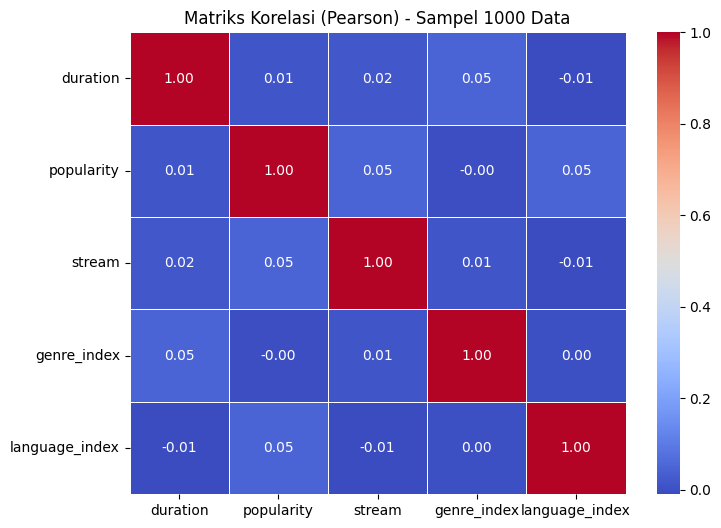

In [175]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Langkah 1: Ambil 1000 sampel data
df_sampled = df_transformed.limit(1000)  # Mengambil 1000 baris pertama

# Langkah 2: Menggabungkan kolom numerik menjadi satu kolom vektor menggunakan VectorAssembler
numerical_columns = ["duration", "popularity", "stream", "genre_index", "language_index"]
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
df_vectorized = assembler.transform(df_sampled)

# Langkah 3: Standarisasi data menggunakan StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(df_vectorized)
df_scaled = scaler_model.transform(df_vectorized)

# Langkah 4: Menghitung korelasi linear (Pearson) antar kolom numerik
correlation_matrix = Correlation.corr(df_scaled, "scaled_features", method="pearson").head()[0]

# Langkah 5: Mengonversi matriks korelasi ke Pandas DataFrame
correlation_array = correlation_matrix.toArray()
correlation_df = pd.DataFrame(correlation_array, columns=numerical_columns, index=numerical_columns)

# Langkah 6: Menampilkan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi (Pearson) - Sampel 1000 Data")
plt.show()


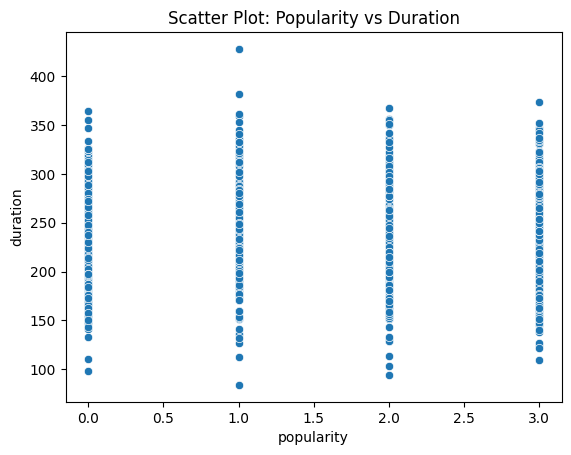

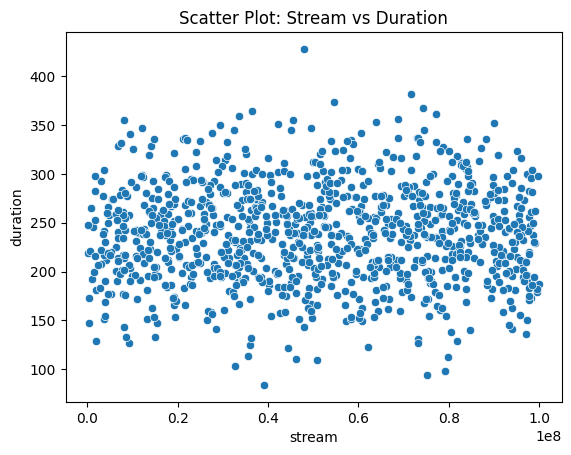

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi scatter plot untuk melihat hubungan antara 'popularity' dan 'duration'
sns.scatterplot(data=df_sampled.toPandas(), x="popularity", y="duration")
plt.title("Scatter Plot: Popularity vs Duration")
plt.show()

# Anda bisa menambahkan scatter plot untuk variabel lain juga
sns.scatterplot(data=df_sampled.toPandas(), x="stream", y="duration")
plt.title("Scatter Plot: Stream vs Duration")
plt.show()


In [180]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Langkah 1: Menyiapkan data
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")  # Membuat kolom 'features'
df_sampled = assembler.transform(df_sampled)

# Langkah 2: Membuat model Decision Tree
dt = DecisionTreeRegressor(featuresCol="features", labelCol="popularity")

# Langkah 3: Menyusun pipeline
pipeline = Pipeline(stages=[dt])  # Hanya menggunakan model decision tree

# Langkah 4: Melatih model
model = pipeline.fit(df_sampled)

# Langkah 5: Evaluasi model
predictions = model.transform(df_sampled)
evaluator = RegressionEvaluator(labelCol="popularity", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.0
